# Exploratory Data Analysis

https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a

# Import Section

In [37]:
import os
#import cv2
import matplotlib.pyplot as plt
from PIL import Image   #https://pillow.readthedocs.io/en/stable/reference/Image.html
from collections import Counter

# Directory Path to Access Data

In [38]:
#define the base data directory and the path to the training data subdirectory
#base directory containing all data
data_directory = "data"
#path to the "train" folder
train_directory = os.path.join(data_directory, "train")
#all 29 classes (A-Z, nothing, space, del)
classes = sorted(os.listdir(train_directory))

# Class Distribution Visualization

Class Distribution Visualization


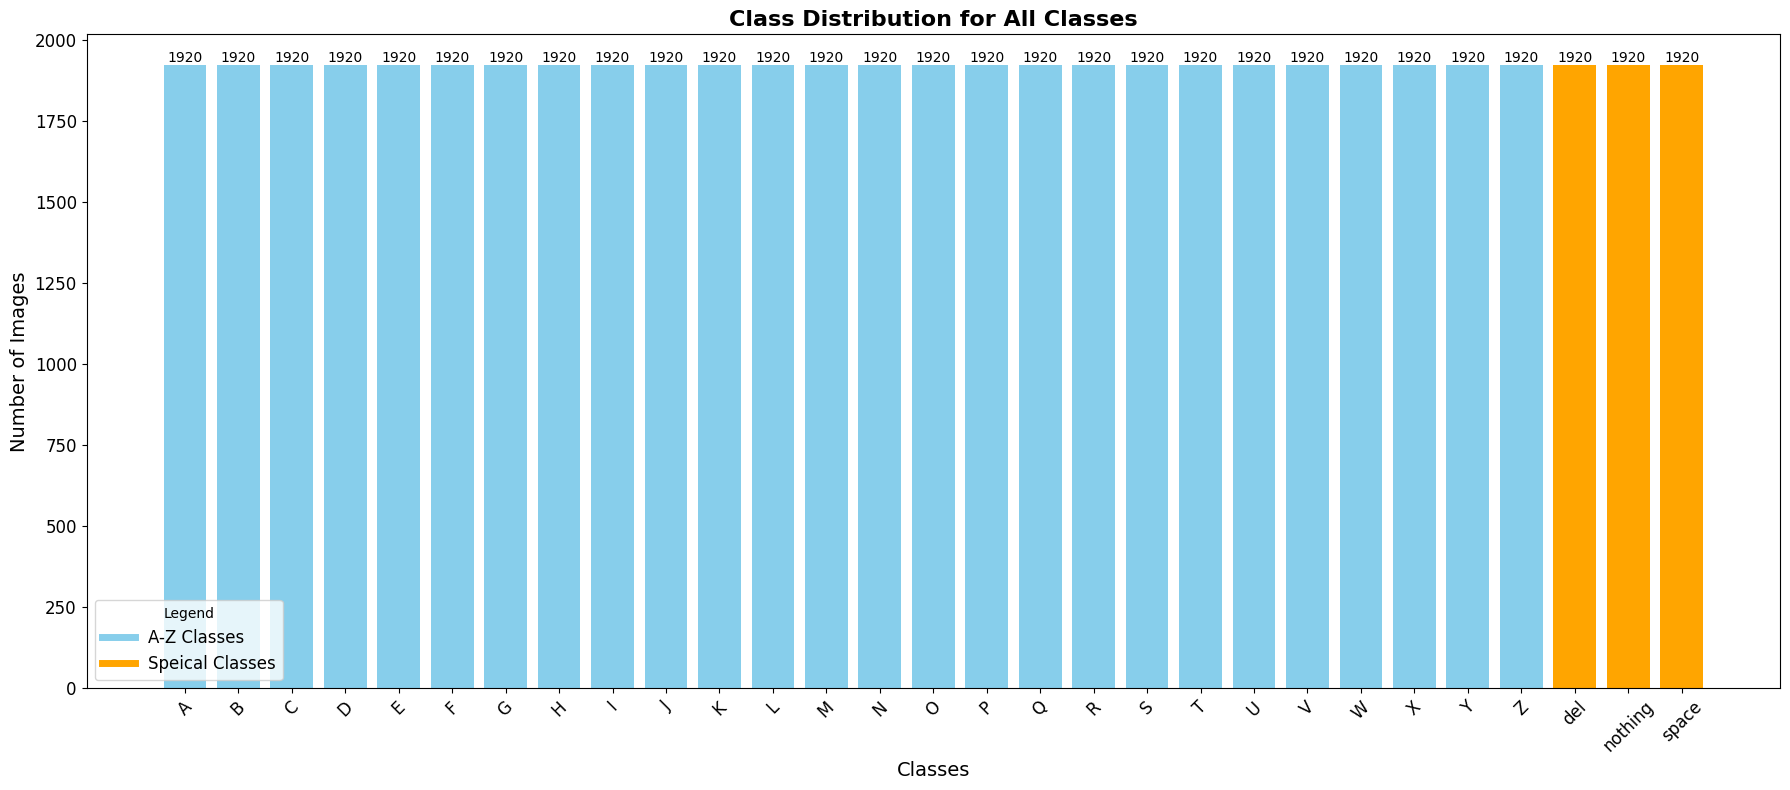

In [39]:
def plot_class_distributions(classes, train_dir):
    '''
    Visualizes the distribution of images across different classes in the training dataset using a bar chart. 
    Differentiates between regular (A-Z) and special cases ("del", "nothing", "space") with color coding.
    Each bar is its own class with the count of images and includes a legend for clarity.

    Args:
        - classes (list): a list of class names (folders) to visualize
        - train_dir (str): the path to the training directory contianing subdirectories for each class

    Returns:
        - None: displays a bar chart visualizing the class distribution
    '''
    #initialize a Counter to store the count of images for each class
    #https://docs.python.org/3/library/collections.html#collections.Counter
    class_counts = Counter()

    #go through each class to calculate the number of images
    for c in classes:
        #path to the folder of the current class
        #os.path(.join) = https://docs.python.org/3/library/os.path.html
        c_path = os.path.join(train_dir, c)
        #skip if not a directory
        #os.path(.isdir)https://docs.python.org/3/library/os.path.html
        if not os.path.isdir(c_path):
            continue
        #count the number of images in the folder
        #https://docs.python.org/3/library/os.html
        class_counts[c] = len(os.listdir(c_path))
        
    #define special cases (nothing, space, del)
    special_classes = ["del", "nothing", "space"]

    #bar colors: one for regular and one for special
    bar_colors = ["skyblue" if c not in special_classes else "orange" for c in class_counts.keys()]

    #create a bar chart 
    #set the figure size
    plt.figure(figsize=(18, 8))
    #plot a bar for each class
    bars = plt.bar(class_counts.keys(), class_counts.values(), color=bar_colors)

    #write the count of each class above each indiviudal bar (since the numbers are too high to tell)
    #https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    for bar in bars:
        height = bar.get_height()
        plt.text(
            #center the text horizontally on the bar
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height}",
            #horizontally align the text in the center of the bar
            ha="center",
            #vertically align the text just above the top of the bar
            va="bottom",
            fontsize=10,
            color="black",
        )

    #label for the graph title
    plt.title("Class Distribution for All Classes", fontsize=16, fontweight="bold")
    #label x-axis
    plt.xlabel("Classes", fontsize=14)
    #label y-axis
    plt.ylabel("Number of Images", fontsize=14)
    #rotate the class labels for better readability: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    plt.xticks(rotation=45, fontsize=12)
    #set font size of the y-axis tick label: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html
    plt.yticks(fontsize=12)
    #create a legend to differentiate the classes in the graph
    plt.legend(
        handles=[
            #create legend entry for A-Z classes with skyblue color
            #https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html
            plt.Line2D([0], [0], color="skyblue", lw=5, label="A-Z Classes"),
            #create legend entry for special classes with an orange color
            plt.Line2D([0], [0], color="orange", lw=5, label="Speical Classes"),
        ],
        fontsize=12,
        title="Legend",
    )
    plt.tight_layout()
    plt.show()

#run the class distribution visualization function
print("Class Distribution Visualization")
plot_class_distributions(classes=classes, train_dir=train_directory)

# Plotting Image Size

Image Size Distribution


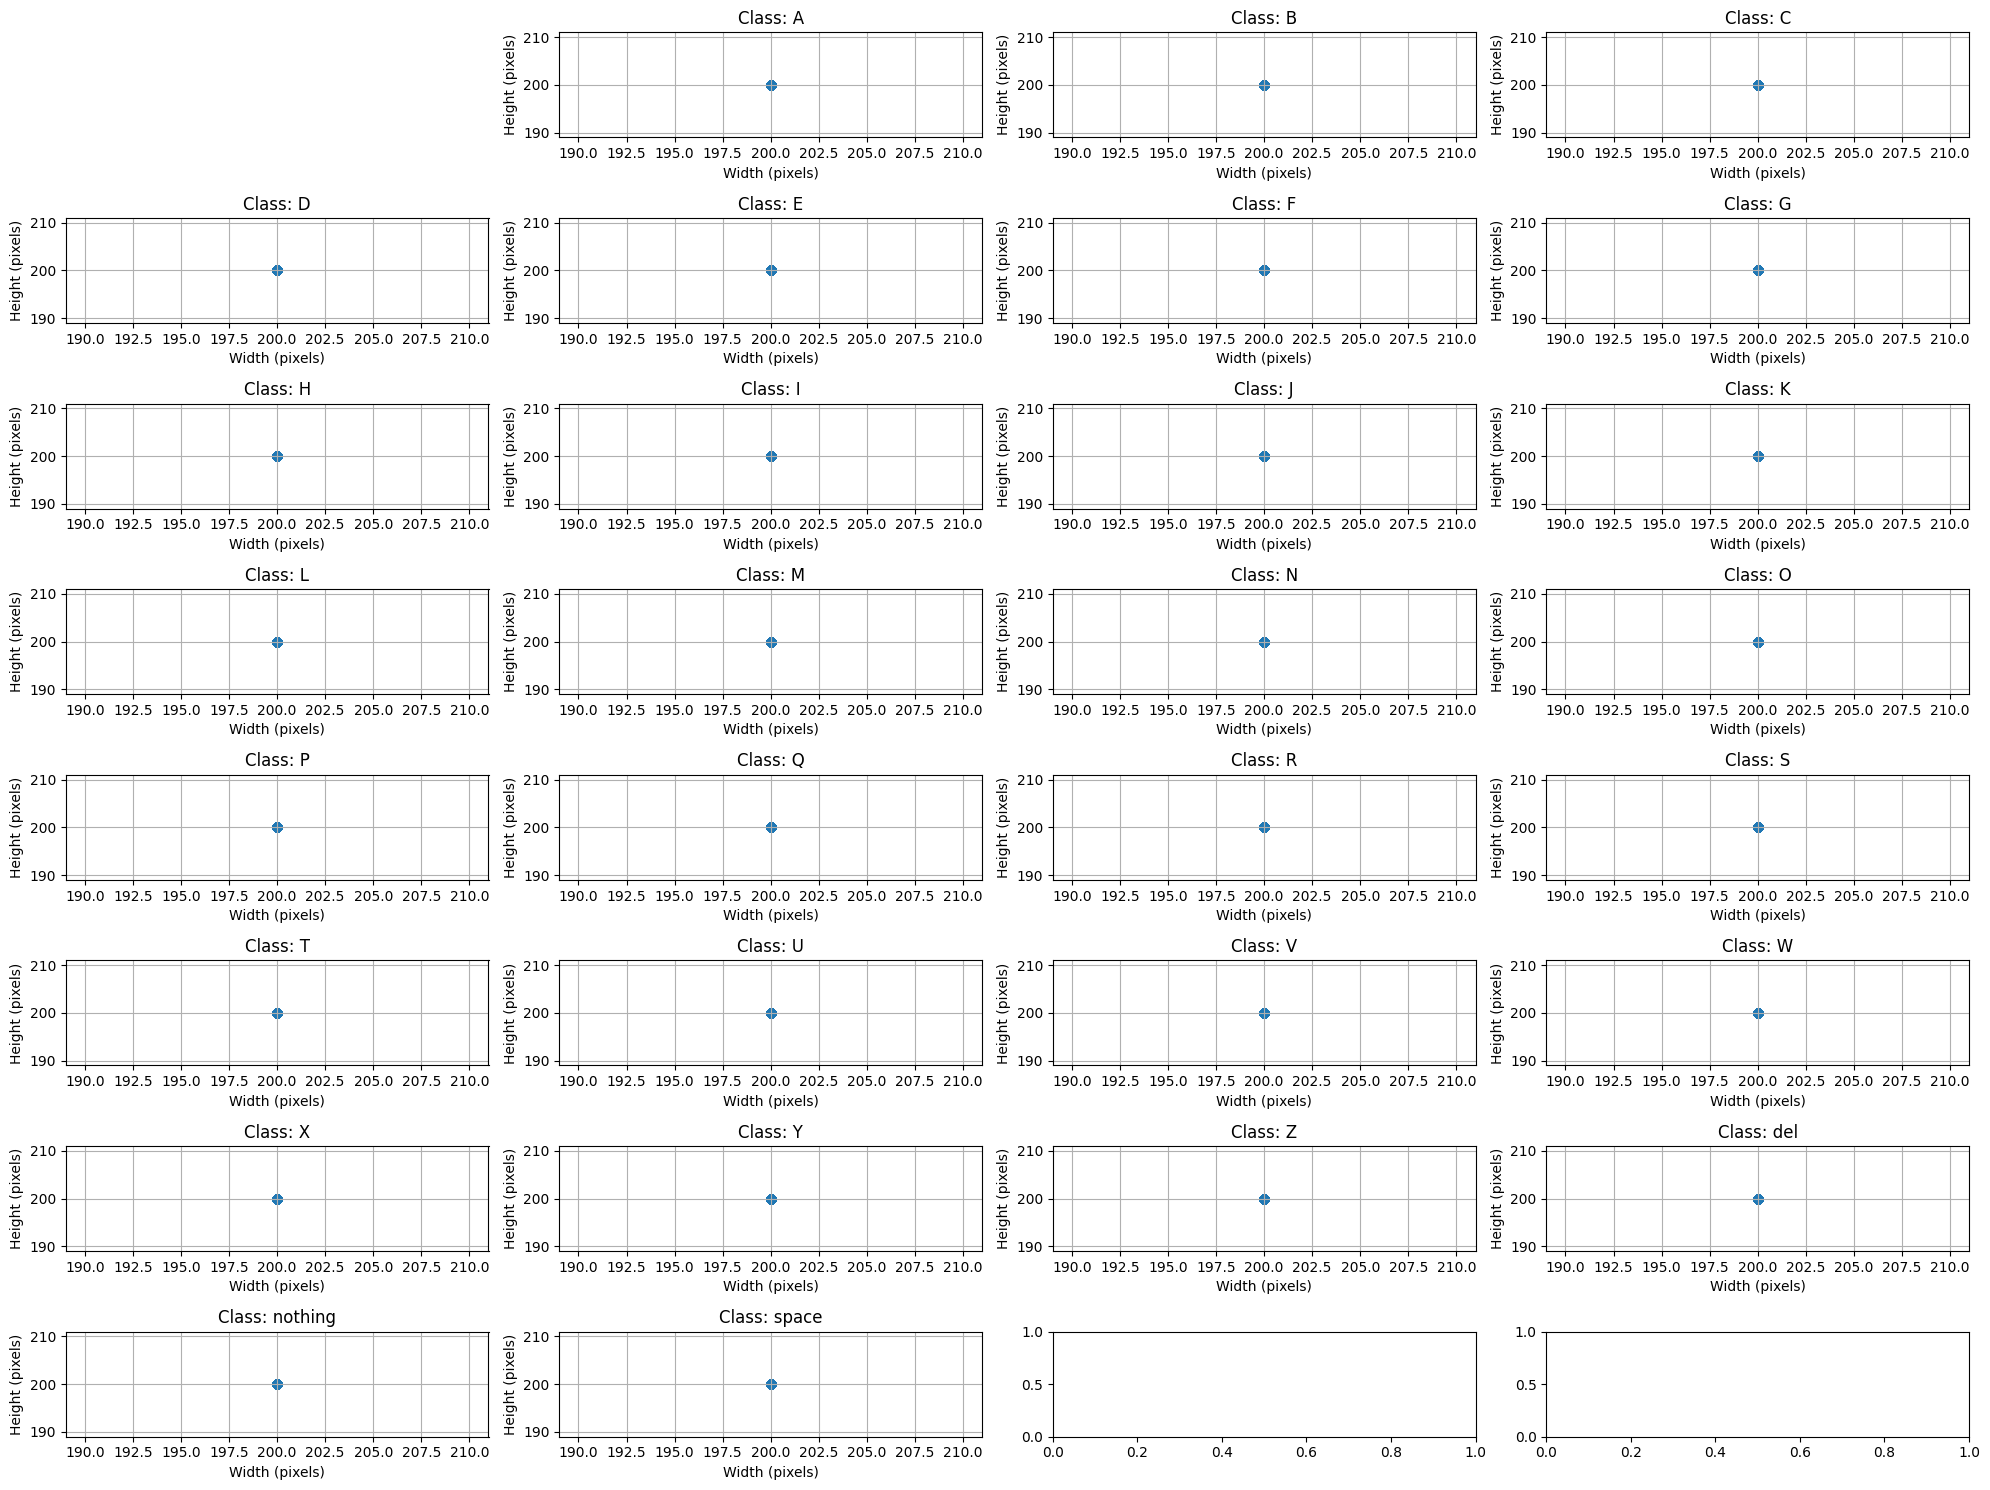

In [40]:
#function to calculate image sizes for each class
def calculate_image_sizes(data_dir, classes):
    '''
    Iterates through image files for each class in the specified data directory to calculate the dimensions (width, height)
    of each image. Organizes these sizes into a dictionary, grouped by class.

    Args:
        - data_dir (str): path to the directory containing subdirectories for each class
        - classes (list): a list of class names (subdirectory names)

    Returns:
        - dict: a dictionary where keys are class names and values are lists of (width, height) tuples for the images in each class
    '''
    #dictonary to store the sizes for each class
    class_sizes = {c: [] for c in classes}

    #iterate through each class and calculate the image sizes
    for c in classes:
        #path to the class folder
        c_path = os.path.join(data_dir, c)
        #skip if not a directory
        if not os.path.isdir(c_path):
            continue
        #go through all image files in the current class directory
        for img_file in os.listdir(c_path):
            #path to the image file
            img_path = os.path.join(c_path, img_file)
            try:
                #open the image using Pillow: https://pillow.readthedocs.io/en/stable/reference/Image.html
                with Image.open(img_path) as img:
                    #append (width, height) tuple
                    class_sizes[c].append(img.size)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return class_sizes

#function to plot image size distributions
def plot_image_size_distribution(class_sizes):
    '''
    Visualizes the distribution of image dimensions (width vs. height) for each class in a grid of scatter
    plots. Automatically adjusts the grid size based on the number of classes and hides unused subplots.

    Args:
        - class_sizes (dict): a dictionary where keys are class names and values are lists of (width, height) tuples for the images

    Returns:
        - None: displays a grid of scatter plots showing the width vs. height for images in each class
    '''
    #number of classes
    num_classes = len(class_sizes)
    #numbr of columns in the grid
    cols = 4
    #calculate rows dynamically: (divide the total number of classes by columns for full rows
    #   and then add an extra row if there are leftover classes
    rows = (num_classes // cols) + (num_classes % cols > 0)

    #create subplots: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
    #flatten axes array for easier indexing: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
    axes = axes.flatten()

    #go through each class and its corresponding image sizes
    for idx, (c, sizes) in enumerate(class_sizes.items()):
        #ensure there are sizes to plot
        if sizes:
            #unzip widths and heights: https://realpython.com/python-zip-function/
            widths, heights = zip(*sizes)
            #scatter plot
            axes[idx].scatter(widths, heights, alpha = 0.6)
            #set class name as title
            axes[idx].set_title(f"Class: {c}", fontsize=12)
            #label x-axis
            axes[idx].set_xlabel("Width (pixels)", fontsize=10)
            #label y-axis
            axes[idx].set_ylabel("Height (pixels)", fontsize=10)
            #add grid for better readability
            axes[idx].grid(True)
        else:
            #hide empty axes explicitly
            axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

#run the functions to get the class image sizes and then output it in a visualization
print("Image Size Distribution")
image_sizes = calculate_image_sizes(data_dir=train_directory, classes=classes)
plot_image_size_distribution(image_sizes)


# Viewing a Sampling of Images

Class Samples


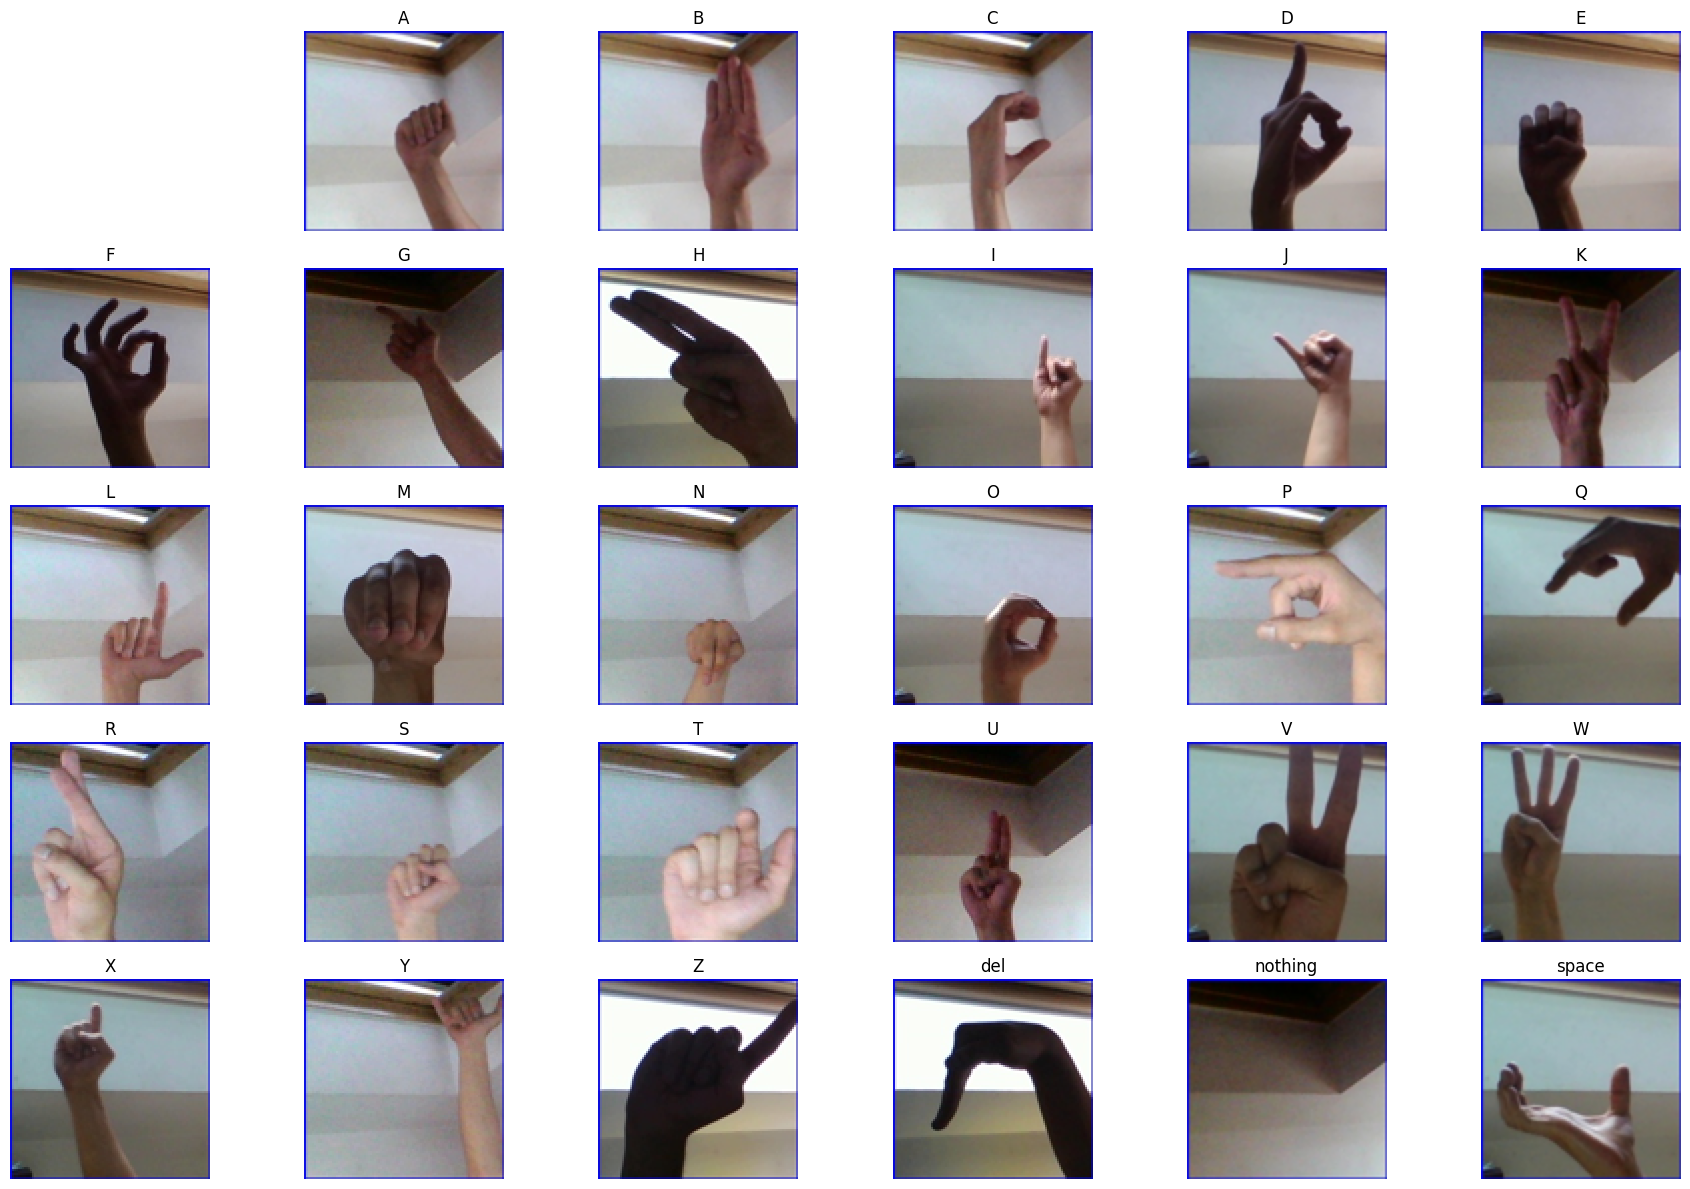

In [41]:
#function to display one sample image per class
def plot_class_samples(train_dir, classes):
    '''
    Displays one sample image from each class in a grid layout. Each subplot shows a resized image and the class label
    as the title. Automatically skips invalid directories and handles errors for missing or unreadable images.

    Args:
        - train_dir (str): path to the training directory containing subdirectories for each class
        - classes (list): a list of class names (subdirectory names)

    Returns:
        - None: displays a grid of sample images, one per class
    '''
    #set the figure size
    plt.figure(figsize=(18, 12))
    #go through each file in the current class directory
    for i, c in enumerate(classes, 1):
        #path to the class folder
        c_path = os.path.join(train_dir, c)
        #skip if not a directory
        if not os.path.isdir(c_path):
            continue
        #pick the first image in the folder
        img_file = os.listdir(c_path)[0]
        #combine the class directory path and file name to get the full image file path
        img_path = os.path.join(c_path, img_file)
        try:
            #open the image using Pillow: https://pillow.readthedocs.io/en/stable/reference/Image.html
            img = Image.open(img_path)
            #resize for better visualization: https://www.codecademy.com/resources/docs/pillow/image/resize
            img_resized = img.resize((100, 100))
            #add a subplot for each image
            plt.subplot(5, 6, i)
            #display the image: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow
            plt.imshow(img_resized)
            #add the class label as the title
            plt.title(c)
            #remove axes for better visualization looks
            plt.axis("off")
        except Exception as e:
            print(f"Error loading image for class {c}: {e}")

    plt.tight_layout()
    plt.show()

#run class samples visualization
print("Class Samples")
plot_class_samples(train_dir=train_directory, classes=classes)